# **Linear Algebra for Deep Learning**

1. **Scalar**: A scalar is a **single number**, it can belong to:

$R$ (real), $N$ (natural), $Z$ (integers), $C$ (complexes).

In [ ]:
a = 3.14  # real scalar

2. **Vectors**: A vector is an **ordered one-dimensional array of numbers**:

In [1]:
import numpy as np

x = np.array([1.0, 2.0, 3.0])  # Vector in ℝ³

- **Accessing Items**

In [2]:
x[0]
x[[0, 2]] 

array([1., 3.])

- **Slice/Complement**

In [5]:
S = [0, 2]
x_S = x[S]          # → [1.0, 3.0]
x_minus_S = np.delete(x, S)  # → [2.0]

print(f"S = {S}")
print(f"x_S = {x_S}")
print(f"x_minus_S = {x_minus_S}")

S = [0, 2]
x_S = [1. 3.]
x_minus_S = [2.]


3. **Matrices**: A matrix is a **2D table of numbers**. It is written:

In [6]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])  # A ∈ ℝ³ˣ²

- **Accessing Items**

In [7]:
A[0, 0] # element in position (1,1) → 1
A[1, :] # second line → [3, 4]
A[:, 0] # first column → [1, 3, 5]

array([1, 3, 5])

- **Transposed**

In [9]:
A_T = A.T # transposed of A→ shape: (2, 3)
print(f"A_T = {A_T}")

A_T = [[1 3 5]
 [2 4 6]]


4. **Tensors**: A tensor is a generalization of vectors and matrices at $dimensions > 2$.

## Notation Summary

| Object | Example in NumPy | Description |
|------------|-----------------------------|-------------------------------------|
| Scalar | $`a = 5.0`$ | Single number |
| Vector | $`x = np.array([1,2,3])`$ | 1D array |
| Matrix | $`A = np.array([[1,2],[3,4]])`$ | 2D table |
| Tensor | $`T = np.random.rand(2,3,4)`$ | N-dimensional array |
| Transpose | $`A.T`$ | Swap rows and columns |
| Broadcasting| $`A + b`$ | Add vector to each row |

### **Matrix Multiplication and Dot Product**

- **Matrix Product**: It can be done only if the **number of columns of the first (A)** is **equal to the number of rows of the second (B)**.

If $A ∈ ℝ^(m×n)$ and $B ∈ ℝ^(n×p)$, then $C = AB ∈ ℝ^(m×p)$.

$$
C_{i,j} = \sum_{k} A_{i,k} B_{k,j}
$$


In [11]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])  # shape (2×2)
B = np.array([[5, 6],
              [7, 8]])  # shape (2×2)

C = A @ B 
print(f"C = {C}")
print(F"The np.dot version = {np.dot(A, B)}")

C = [[19 22]
 [43 50]]
The np.dot version = [[19 22]
 [43 50]]


- **Hadamard Product (Element by element)**: It is different from the matrix product: it **multiplies each corresponding element**.

In [13]:
H = A * B
H

array([[ 5, 12],
       [21, 32]])

- **Scalar product** between two vectors (Dot Product): If $x, y ∈ ℝ^n$, then:

$$
x^T y = y^T x = \sum_{i} x_i y_i
$$

In [14]:
x = np.array([1, 2])
y = np.array([3, 4])
dot = np.dot(x, y)  # → 1*3 + 2*4 = 11

## Exercise: Solve the linear system Ax = b

You have this system of **linear equations**:

$
\begin{cases}
2x + 3y = 8 \\
4x + y = 6
\end{cases}
$

The goal is to find **x** and **y** that satisfy both equations.

---

### Step 1: Let's write in matrix form `Ax = b`

This system is written like this:

$
A = \begin{bmatrix}
2 & 3 \\
4 & 1 \\
\end{bmatrix}, \quad
x = \begin{bmatrix}
x \\
y \\
\end{bmatrix}, \quad
b = \begin{bmatrix}
8 \\
6 \\
\end{bmatrix}
$

So in compact form:

$
Ax = b
$

---




In [ ]:
import numpy as np

A = np.array([[2, 3],
              [4, 1]])

b = np.array([8, 6])

x = np.linalg.solve(A, b)
print("Solution:", x)

Solution: [1. 2.]


### Solving the Equation

We are solving the following equation:

$$
2x + 3y = 8
$$

From the solution we found earlier:

$$
x = 1, \, y = 2
$$

We substitute these values into the equation:

$$
2x + 3y = 8 \implies 2 \cdot 1 + 3 \cdot 2 \implies 2 + 6 = 8
$$

## **Inverse, Linear Dependence and Span**

### **When can you use the inverse `A⁻¹`?**

You have the equation:

$$
Ax = b
$$

If `A` is **invertible**, then you can write:

$$
x = A^{-1}b
$$

But be careful: using **`A⁻¹` is not recommended in practice** in real software, because it can be numerically imprecise. Better to use methods like `np.linalg.solve`.

---

### **When does $`A⁻¹` exist? (Condition)**

`A⁻¹` exists **only if**:

- `A` is a **square matrix** $(`m = n`)$
- Its columns are **linearly independent**

---

### **What is linear dependence?**

A set of vectors (columns) is **linearly dependent** if **one can be written as a combination of the others**.

Example:
```python
v1 = [1, 2]
v2 = [2, 4] # v2 = 2 * v1 → dependent
```

→ If the vectors are **dependent**, **they do not add new directions**.

---

### **What is the “span”?**

The **span** of a set of vectors is **the set of all points** that you can reach by combining them linearly.

$$
\text{span}(v_1, v_2, ..., v_n) = \left\{ \sum_i \alpha_i v_i \right\}
$$

💡 The equation `Ax = b` has **solution** only if `b` **is in the span of the columns of A** (called **column space** or **range**).

---

### **How many vectors do you need to cover all `ℝᵐ`?**

- You need **at least m **linearly independent** vectors** in `ℝᵐ` to cover the whole space.
- If you have fewer, or if they are dependent, **you cannot reach all possible `b`** → no solution.

Example:
- A 3×2 matrix generates at most one **plane** in `ℝ³`. So `b` must **lie on the plane** to have a solution.

---

### **Conditions for invertibility**

For `A` **invertible**:

| Requirement | Meaning |
|-----------------------|-------------------------------------------------|
| `A` is **square** | Number of rows = number of columns (`m = n`) |
| **Independent columns** | No column can be derived from the others |
| Space column = `ℝᵐ` | You can cover every possible `b` |
| Only one solution | No ambiguity: only one `x` for every `b` |

---

### **Right and left inverse**

For a square matrix:

$$
A^{-1}A = I \quad \text{(left inverse)} \\
AA^{-1} = I \quad \text{(right inverse)}
$$

When `A` is square and invertible, the two things coincide.

### **NumPy summary with examples**


In [17]:
import numpy as np

A = np.array([[1, 2],
[3, 4]])

b = np.array([5, 11])

# Correct method to solve Ax = b
x = np.linalg.solve(A, b)

# Theoretical method (less precise): x = A⁻¹ b
x_theoretical = np.linalg.inv(A) @ b

## **Norms, Special Matrices and Properties**

### **Vector Norms (measure of the "length" of a vector)**

#### **L1 Norm (Manhattan norm)**

$$
\|x\|_1 = \sum_i |x_i|
$$

- **Sum of absolute values**.
- Used when the transition from 0 to ≠0 is important (e.g. L1 regularization).
- Increases linearly as an element moves away from 0.

In [22]:
import numpy as np
x = np.array([1, -2, 0, 3])
l1_norm = np.sum(np.abs(x)) # → 6

print(f"L1 Norm = {l1_norm}")

L1 Norm = 6


#### **L∞ Norm (Max norm)**

$$
\|x\|_\infty = \max_i |x_i|
$$

- Returns **the element with maximum absolute value**.

In [21]:
# x = np.array([1, -2, 0, 3])
max_norm = np.max(np.abs(x)) # → 3
print(f"Max Norm = {max_norm}")

Max Norm = 3


#### **L0 “norm”**

- **Not a real norm**.
- Counts how many $elements ≠ 0$, but **does not respect the mathematical properties of a norm**.



#### **Frobenius norm (for matrices)**

$
\|A\|_F = \sqrt{\sum_{i,j} A_{i,j}^2}
$

- It is like the **L2 norm** but applied to all cells of a matrix.

In [24]:
A = np.array([[1, 2], [3, 4]])
frobenius_norm = np.sqrt(np.sum(A**2)) # → Frobenius norm

print(f"Frobenius norm = {frobenius_norm}")

Frobenius norm = 5.477225575051661


#### **Dot product and angle**

$
x^T y = \|x\|_2 \|y\|_2 \cos \theta
$

- Used to calculate **angle between vectors**.
- If $( x^T y = 0 )$, the vectors are **orthogonal** (90° angle).

## **Special matrices and vectors**

---

### **Diagonal matrix**

$$
D_{i,j} = 0 \quad \text{if } i \neq j
$$

- Only values ​​along the diagonal ≠ 0.
- Multiplication: **fast** (scale elements).
- Inverse exists only if **no diagonal value is 0**.

```python
v = np.array([1, 2, 3])
D = np.diag(v)
x = np.array([10, 20, 30])
D @ x # → [10, 40, 90]
```

### **Symmetric matrix**

$$
A = A^T
$$

- Ex: distance matrices, correlations, kernels.
- Ai,j = Aj,i

```python
A = np.array([[1, 2], [2, 3]]) # Symmetric
```

---

### **Unit vector**

$$
\|x\|_2 = 1
$$

- Vector with norm 1 (ex: pure directions).

```python
x = np.array([1, 0])
np.linalg.norm(x) # → 1
```

---

### **Orthogonality**

Two vectors are **orthogonal** if:

$$
x^T y = 0
$$

If they are also **unitary**, then they are **orthonomal**.

---

### **Orthogonal matrix**

$$
A^T A = AA^T = I
\Rightarrow A^{-1} = A^T
$$

- **Orthonomal** rows and columns.
- Inverse = transpose → **very fast to invert**.
- Fundamental for rigid transformations (rotations, reflections).

```python
from scipy.stats import ortho_group
A = ortho_group.rvs(dim=3)
A.T @ A # → Identity matrix
```

---

## In summary:

| Subject | Formula | Meaning |
|-------------------------|--------------------------|----------------------------------------|
| L1 norm | $( \|x\|_1 = \sum |x_i| )$ | Total displacement measure |
| L∞ norm | $( \max |x_i| )$ | Maximum absolute value |
| Frobenius norm | $( \sqrt{\sum A_{i,j}^2} )$ | Norm of a matrix (like L2) |
| Orthogonality | $( x^T y = 0 )$ | 90° vectors |
| Orthogonal matrix | $( A^T A = I )$ | Inverse = transpose |
| Diagonal matrix | Diagonal only ≠ 0 | Fast multiplication and inversion |


## **L2 Norm (Euclidean Norm)**

### Definition:

$
\|x\|_2 = \sqrt{\sum_i x_i^2}
$

- It is the **square root of the sum of the squares** of the elements of the vector.
- It measures **the distance of the vector from the origin** in an n-dimensional space.
- It is the **most used** norm in machine learning and deep learning.

---

### Practical example:

In [ ]:
import numpy as np

x = np.array([3, 4])

norm_L2 = np.linalg.norm(x) # → √(3² + 4²) = √(9 + 16) = √25 = 5
print(norm_L2) # → 5.0

### When to use it?

- In regression: **minimize the L2 norm of errors** = *least squares*.
- In optimization: **L2 penalty** → *Ridge regression*.
- In deep learning: **weight normalization**, **L2 loss** etc.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

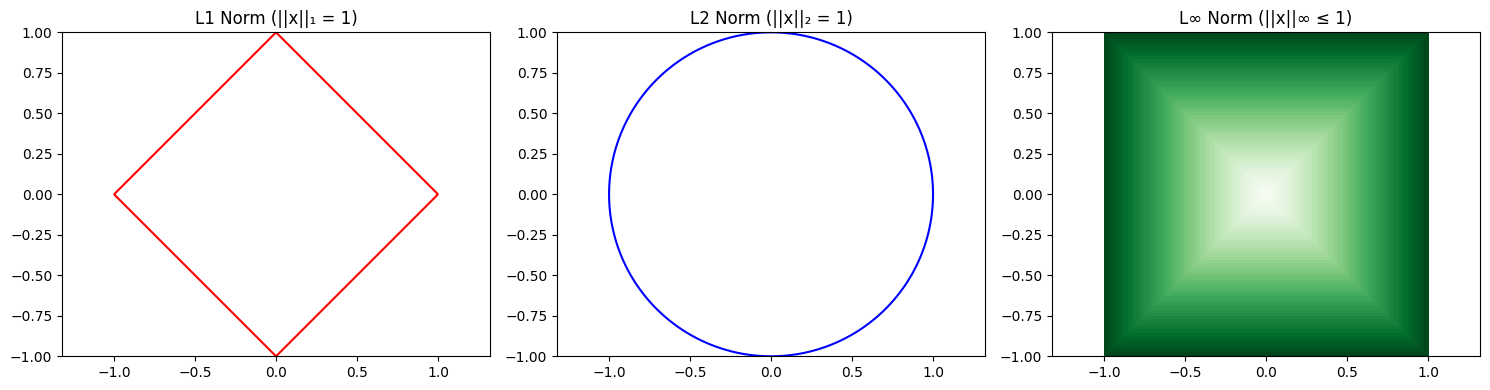

In [34]:
# Setup
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x, y)

# L1 norm: diamond shape
L1 = np.abs(X) + np.abs(Y)

# L2 norm: circle
L2 = np.sqrt(X**2 + Y**2)

# L∞ norm: square shape
Linf = np.maximum(np.abs(X), np.abs(Y))

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# L1 norm
axs[0].contour(X, Y, L1, levels=[1], colors='red')
axs[0].set_title("L1 Norm (||x||₁ = 1)")
axs[0].axis('equal')

# L2 norm
axs[1].contour(X, Y, L2, levels=[1], colors='blue')
axs[1].set_title("L2 Norm (||x||₂ = 1)")
axs[1].axis('equal')

# Linf norm
axs[2].contourf(X, Y, Linf, levels=np.linspace(0, 1, 50), cmap='Greens')
axs[2].contour(X, Y, Linf, levels=[1], colors='green') 
axs[2].set_title("L∞ Norm (||x||∞ ≤ 1)")
axs[2].axis('equal')

plt.tight_layout()
plt.show()


### ❤️ On the left — **L1 Norm (red)**

- **Diamond** shape.
- Represents all points where $( |x| + |y| = 1 )$.
- It's like walking in a "absolute step" grid.

---

### 💙 In the center — **L2 Norm (blue)**

- The classic **circle**.
- It's the Euclidean distance: $( \sqrt{x^2 + y^2} = 1 )$
- Represents points equidistant from the origin in a symmetric way.

---

### 💚 On the right — **L∞ Norm (green)**

- **Square** with sides parallel to the axes.
- Defined by $( \max(|x|, |y|) = 1 )$
- It's like saying: "I push myself to the maximum of only one of the two".

### In other words:

- **L1** → gives you a “full” because it adds the distances in all directions → diamond.
- **L2** → gives you a round full → circle.
- **L∞** → just tells you “you are at most 1 in *some* of the coordinates”, so you only get **the edges** of the square. The rest is not exact norm 1.

## **Eigendecomposition, Symmetric Matrices and Positivity**

---

### **What is eigendecomposition?**

It is the process in which a matrix `A` is **decomposed** into its:

- **Eigenvalues** (eigenvalues): $( \lambda )$
- **Eigenvectors** (eigenvectors): $( v )$

The general form:
$$
A = V \cdot \text{diag}(\lambda) \cdot V^{-1}
$$

- `V`: matrix with columns = eigenvectors
- `diag(λ)`: diagonal matrix with eigenvalues

**Geometric intuition**:
`A` **“stretches” the space** in particular directions (the eigenvectors), scaling each direction with its eigenvalue $( \lambda )$.

---

### **When is eigendecomposition needed?**

- To **analyze** or **simplify** complex problems
- For **data compression** (e.g. PCA)
- To understand **the dynamic behavior** of linear systems

---

### **Special case: Real symmetric matrices**

Every **real symmetric matrix** $( A = A^T )$ can be decomposed as:

$$
A = Q \Lambda Q^T
$$

- `Q`: **orthogonal** matrix (orthonormal eigenvectors)
- `Λ`: **diagonal** with eigenvalues

Here **the inverse is not needed**, because $( Q^{-1} = Q^T )$

---

### **Graph (figure 2.3 in the book)**

Shows what `A` does:
- A **circle of vectors unitary** is transformed by `A` into an ellipse.
- The principal stretching directions are the eigenvectors.
- The **stretching factors** are the eigenvalues.

---

### **Singularities and zero eigenvalues**

- A matrix is ​​**singular** (not invertible) ⇔ at least one eigenvalue is 0.

---

### **Automatic composition optimization**

The function:

$$
f(x) = x^T A x \quad \text{s.t.} \quad \|x\|_2 = 1
$$

- Take maximum value when `x` is **the eigenvector with the maximum eigenvalue**
- Take minimum value when `x` is **the eigenvector with the minimum eigenvalue**

---

### **Matrix types based on eigenvalues**

| Type | Eigenvalue Conditions $( \lambda )$ |
|--------------------|---------------------------------------------------------|
| **Positive definite** | All $( $\lambda > 0 )$ |
| **Positive semidefinite**| All $( \lambda \geq 0 )$ |
| **Negative definite** | All $( \lambda < 0 )$ |
| **Negative semidefinite**| All $( \lambda \leq 0 )$ |

---

### **Useful Properties**

1. If `A` is **positive semidefinite**, then:

   $$
   x^T A x \geq 0 \quad \forall x
   $$

2. If `A` is **positive definite**, then:

   $$
   x^T A x = 0 \implies x = 0
   $$

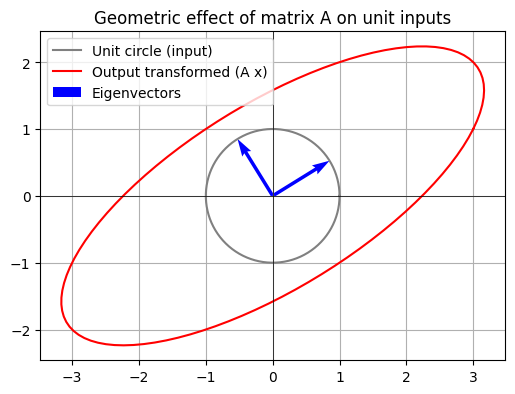

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define a symmetric matrix (so diagonalizable with real values)
A = np.array([[3, 1],
[1, 2]])

# Calculate eigenvalues ​​(eigvals) and eigenvectors (eigvecs)
eigvals, eigvecs = np.linalg.eig(A)

# Create a grid of unit vectors (circle)
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.vstack((np.cos(theta), np.sin(theta))) # 2×100 shape

# Apply A to each vector of the circle (matrix × vector multiplication)
ellipse = A @ circle

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(circle[0], circle[1], label='Unit circle (input)', color='gray')
ax.plot(ellipse[0], ellipse[1], label='Output transformed (A x)', color='red')

# Let's draw the eigenvectors
origin = np.array([[0, 0], [0, 0]])
scaled_eigvecs = eigvecs * eigvals # scale by eigenvalues
ax.quiver(*origin, eigvecs[0], eigvecs[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Eigenvectors')

ax.set_aspect('equal')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title("Geometric effect of matrix A on unit inputs")
ax.legend()
plt.grid(True)
plt.show()

### What you are seeing:

- The **gray circle** represents **all unit vectors** (with $( \|x\|_2 = 1 )$) → it is the **original space**.
- The **red curve** is the result of applying the matrix `A` to every vector of the circle → it is the **new deformed space**.
- The **blue arrows** are the **eigenvectors** of the matrix `A`:
- They indicate the **directions in which the circle is stretched**.
- The **length** of the arrows is proportional to the **eigenvalues** → how much that direction is stretched.

---

### Interpretation

The matrix `A` is "pulling" the plane exactly **along the eigenvectors**, and the amount of stretching is the **eigenvalue**.

So:
- Where you see the ellipse stretching → there is an eigenvector.
- The intensity of the elongation → is the corresponding eigenvalue.

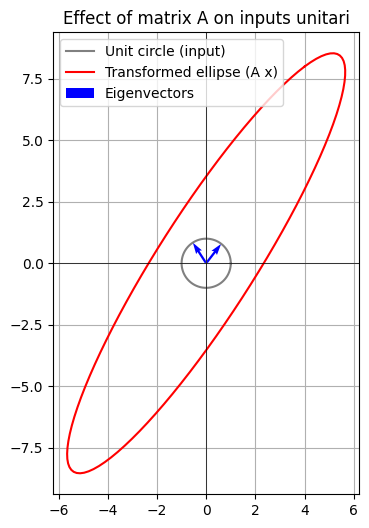

Eigenvalues: [ 9.17890835 -2.17890835]
Eigenvectors:
 [[ 0.61126724 -0.54343157]
 [ 0.79142426  0.83945347]]


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 🔧 CHANGE MATRIX A HERE
A = np.array([[4, 4],
[8, 3]])

# Eigenvalue and eigenvector computation
eigvals, eigvecs = np.linalg.eig(A)

# Grid: unit circle
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.vstack((np.cos(theta), np.sin(theta)))

# Apply A to all vectors in the circle
ellipse = A @ circle

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(circle[0], circle[1], label='Unit circle (input)', color='gray')
ax.plot(ellipse[0], ellipse[1], label='Transformed ellipse (A x)', color='red')

# Eigenvectors (in blue)
origin = np.array([[0, 0], [0, 0]])
scaled_vecs = eigvecs * eigvals
ax.quiver(*origin, eigvecs[0], eigvecs[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Eigenvectors')

ax.set_aspect('equal')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title("Effect of matrix A on inputs unitari")
ax.legend()
plt.grid(True)
plt.show()

# Print values ​​for study
print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

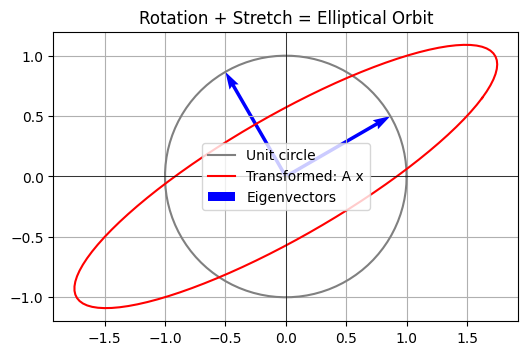

In [39]:
# Create a matrix that combines stretching + rotation
theta = np.pi / 6 # rotation angle: 30 degrees
stretch_x = 2 # stretching along x
stretch_y = 0.5 # compression along y

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
[np.sin(theta), np.cos(theta)]])

# Stretch matrix (non-uniform scaling)
S = np.array([[stretch_x, 0],
[0, stretch_y]])

# Final matrix: rotation + stretching
A = R @ S @ R.T # apply scaling in a rotated basis

# Eigenvalue and eigenvector calculation
eigvals, eigvecs = np.linalg.eig(A)

# Circle unitary
theta_grid = np.linspace(0, 2 * np.pi, 100)
circle = np.vstack((np.cos(theta_grid), np.sin(theta_grid)))
ellipse = A @circle

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(circle[0], circle[1], label='Unit circle', color='gray')
ax.plot(ellipse[0], ellipse[1], label='Transformed: A x', color='red')

# Eigenvectors
origin = np.array([[0, 0], [0, 0]])
ax.quiver(*origin, eigvecs[0], eigvecs[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Eigenvectors')

ax.set_aspect('equal')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title("Rotation + Stretch = Elliptical Orbit")
ax.legend()
plt.grid(True)
plt.show()

#### Step by step, but you will create your own galaxy using a 2x2 matrix that combines:

- **Stretch**
- **Compression**
- **Rotation**

**Objective**
Build a **matrix** A that:

1. **Rotates the space** by an angle of your choice.
2. **Stretches** in one direction and squashes in the other.
3. **Show the result** graphically.

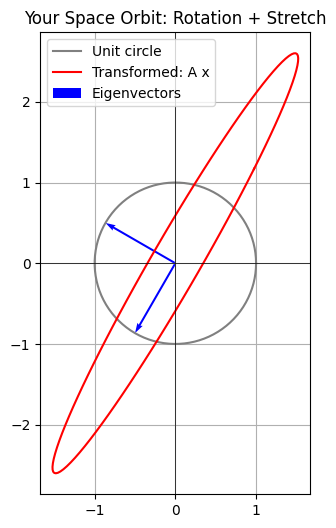

(array([0.3, 3. ]),
 array([[-0.8660254, -0.5      ],
        [ 0.5      , -0.8660254]]))

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters chosen by us
theta = np.radians(60) # Rotation by 60°
stretch_x = 3.0 # Stretching x-axis
stretch_y = 0.3 # Compression y-axis

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
[np.sin(theta), np.cos(theta)]])

# Scaling matrix
S = np.array([[stretch_x, 0],
[0, stretch_y]])

# Full matrix: rotation + stretching
A = R @ S @ R.T

# Eigenvalues ​​and eigenvectors
eigvals, eigvecs = np.linalg.eig(A)

# Unit circle
angles = np.linspace(0, 2 * np.pi, 100)
circle = np.vstack((np.cos(angles), np.sin(angles)))
ellipse = A @ circle

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the circle and the transformed ellipse
ax.plot(circle[0], circle[1], label='Unit circle', color='gray')
ax.plot(ellipse[0], ellipse[1], label='Transformed: A x', color='red')

# Eigenvectors (blue)
origin = np.array([[0, 0], [0, 0]])
ax.quiver(*origin, eigvecs[0], eigvecs[1], angles='xy',
scale_units='xy', scale=1, color='blue', label='Eigenvectors')

# Chart Settings
ax.set_aspect('equal')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title("Your Space Orbit: Rotation + Stretch")
ax.legend()
plt.grid(True)
plt.show()

eigvals, eigvecs


### Interpretation:

- The eigenvector associated with $( \lambda = 3.0 )$ is the direction in which the ellipse **expands the most**.
- The other, with $( \lambda = 0.3 )$, is the direction in which the space is **compressed**.
- The ellipse you see is the **deformed image of the unit circle** under the transformation of `A`.

## **SVD: Singular Value Decomposition**

---

### What is SVD?

**Singular Value Decomposition** is a method for decomposing **any real matrix** \( A \) into **three fundamental components**:

$$
A = U D V^T
$$

Where:

- $( A \in \mathbb{R}^{m \times n} )$
- $( U \in \mathbb{R}^{m \times m} )$ → **orthogonal** (columns = *left-singular vectors*)
- $( V \in \mathbb{R}^{n \times n} )$ → **orthogonal** (columns = *right-singular vectors*)
- $( D \in \mathbb{R}^{m \times n} )$ → **rectangular diagonal** with the **singular values** on the diagonal

---

### Why is it different from eigendecomposition?

| Eigendecomposition | SVD |
|------------------------------|---------------------------------------|
| Requires `A` to be square | Works for **any matrix** |
| `A = V Λ V⁻¹` | `A = U D Vᵀ` |
| Use eigenvalues/eigenvectors | Use **singular** values ​​and vectors |

---

### What does SVD tell us?

- The **singular values** (singular values ​​of `D`) are the **square roots** of the **eigenvalues** of \( A^T A \) or \( A A^T \).
- The **right-singular vectors** (columns of `V`) are the **eigenvectors of \( A^T A \)**.
- **Left-singular vectors** (columns of `U`) are **the eigenvectors of \( A A^T \)**.

---

### What is SVD for?

1. **Decompose** any matrix, even non-square.
2. **Understand the geometry** of the transformation done by `A`.
3. **Data compression** (e.g. PCA, dimensional reduction).
4. **Pseudoinverse** of non-invertible matrices.
5. **Numerical stability** for ill-posed problems.

## **SVD & Pseudoinverse (Moore-Penrose)**

---

### **SVD (Singular Value Decomposition)**

The SVD writes **any real matrix** $( A \in \mathbb{R}^{m \times n} )$ as:

$
A = U D V^T
$

- $`U ∈ ℝ^{m×m}`$ → **orthogonal matrix** (columns = left-singular vectors)
- $`D ∈ ℝ^{m×n}`$ → **rectangular diagonal** (singular values)
- $`V ∈ ℝ^{n×n}`$ → **orthogonal matrix** (columns = right-singular vectors)

> The **SVD always exists**, even when the eigendecomposition **is not defined** (e.g. for non-square matrices).

---

### **Connection with eigendecomposition**

- The **left-singular vectors** of $`A`$ = eigenvectors of $( AA^T )$
- The **right-singular vectors** of $`A`$ = eigenvectors of $( A^T A )$
- The **singular values** = √ (eigenvalues ​​of $( A^T A )$)

---

### **What is it for?**

1. Data compression (e.g. PCA)
2. Approximate reconstruction
3. Dimensional reduction
4. Inversion of non-square matrices (enter the pseudoinverse…)

---

## **Moore-Penrose Pseudoinverse**

> A “generalized inverse” for **non-square** or **singular** matrices.

---

### Practical definition:

Given the **SVD** of $( A = U D V^T )$, the pseudoinverse is:

$$
A^+ = V D^+ U^T
$$

- $( D^+ )$: obtained by **inverting singular values ​​≠ 0** and **transposing**
- Works even when $`A`$ **has no normal inverse**

---

### **What does the pseudoinverse really do?**

- If **A has more rows than columns** (`tall matrix`):
- There is not always a solution to $( Ax = y )$
- But $( A^+ y )$ gives **the closest solution** to $`y`$ (minimizes ( $||Ax - y||_2$ ))

- If **A has more columns than rows** (`wide matrix`):
- Many possible solutions
- $( A^+ y )$ returns **the one with minimum norm**, i.e. **the shortest**.

---

### Theoretical formula:

$$
A^+ = \lim_{\alpha \to 0} (A^T A + \alpha I)^{-1} A^T
$$

But in modern software (like NumPy), we use **direct SVD**, which is **more numerically stable**.

---

### Deep insight

The **pseudoinverse is like a hand that tries to invert even what is "crooked", incomplete or unbalanced**, finding the **closest possible or most “economical” solution**.

## **Minimizing the reconstruction error: PCA and Frobenius norm**

---

### Goal

Given a set of points $( x^{(i)} )$, we want to find a **encoding matrix `D`** that allows us to reconstruct the inputs well, but using **fewer dimensions**.

> In practice: we want to **compress the information** in a smaller space, **without losing too much content**.

---

### The problem

We want to find $( D )$ such that, for each point:

$$
r(x^{(i)}) = D D^T x^{(i)}
$$

Where:

- $( D \in \mathbb{R}^{n \times l} )$, with $( l < n )$: **projection onto a smaller space**
- The reconstructed vector $( r(x) )$ is obtained **projecting and then reconstructing** with `D`.

---

### **Objective function**

Minimize **the total reconstruction error** over all data:

$$
D^* = \arg \min_D \| X - X D D^T \|_F^2 \quad \text{s.t.} \quad D^T D = I
$$

- Where $( X )$ is the data matrix (each row an example)
- We use the **Frobenius norm** (sum of the squares of all the elements)
- The constraint $( D^T D = I )$ means: **the columns of D are orthonormal**

---

### Simple case: $l = 1$

We want to find a single vector `d`, with norm 1, such that:

$$
\min_d \sum_i \| x^{(i)} - d d^T x^{(i)} \|_2^2 \quad \text{s.t.} \quad \|d\| = 1
$$

This is equivalent to **projecting all the data onto a single direction**
and finding the one that **preserves as much variance as possible** (i.e. **minimizes the loss**).

---

### Mathematical steps (simplified):

1. Write the problem in matrix form: $( X \in \mathbb{R}^{m \times n} )$
2. Develop the error with **trace**, using cyclic properties
3. Simplify and arrive at:

$$
\max_d \operatorname{Tr}(d^T X^T X d) \quad \text{s.t.} \quad d^T d = 1
$$

Solution: **the principal eigenvector of $( X^T X )$** (the one with **the largest eigenvalue**)

---

### Final result

- The **optimal direction `d`** is the **first principal component** of the data.
- If we want more than one direction (e.g., reduce to `l` dimensions), we take the **first `l` eigenvectors** of $( X^T X )$.
- This is the heart of **Principal Component Analysis (PCA)**.

---

### Intuition

We are looking for the **subspace that “explains” the data best**, that is:

- where **the projection has minimum error**
- or equivalently, where **the projected variance is maximum**

---

### Connection with SVD

Actually, we can get the PCA directly from the **SVD of `X`**:

$$
X = U D V^T
$$

The **principal components** are the **first columns of `V`**.

The **explained variance** is given by the **singular values ​​squared**.

### **PCA Exercise**



In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Simulate a 2D dataset with variance stretched in one direction
np.random.seed(42)
mean = [0, 0]
cov = [[3, 1.5], [1.5, 1]] 
X = np.random.multivariate_normal(mean, cov, size=100)

In [54]:
# Center the data (subtract the mean)
X_centered = X - np.mean(X, axis=0)

In [55]:
# Calculate the SVD of the centered data
U, S, Vt = np.linalg.svd(X_centered)

In [56]:
# The first principal component (direction of maximum variance)
pc1 = Vt[0]

In [57]:
# Let's project the data onto the first component to visualize
X_proj = X_centered @ pc1[:, np.newaxis] @ pc1[np.newaxis, :]

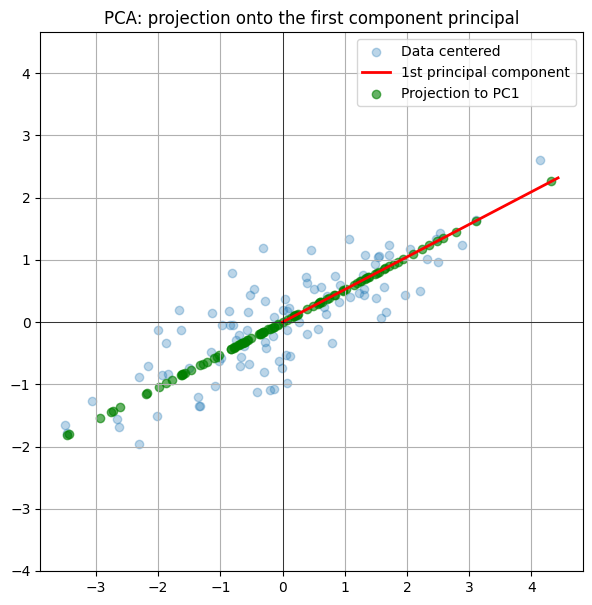

In [58]:
# View
plt.figure(figsize=(7, 7))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3, label='Data centered')
plt.plot([0, pc1[0]*5], [0, pc1[1]*5], color='red', label='1st principal component', linewidth=2)
plt.scatter(X_proj[:, 0], X_proj[:, 1], color='green', alpha=0.6, label='Projection to PC1')

plt.axis('equal')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("PCA: projection onto the first component principal")
plt.legend()
plt.grid(True)
plt.show()

### What did we do?

1. We generated data with a preferred direction (covariance).
2. We **centered** it.
3. We applied **SVD** to find the **first eigenvector** of $( X^T X )$.
4. We **projected all points** along that direction.

---

This is **the mathematical basis of dimensionality reduction**, **data compression**, and **techniques like linear autoencoder**.

# **Conceptual Summary – Linear Algebra for Deep Learning (Chapter 2)**

---

## **Core Objects**

| Object     | Symbol / Form                          | Meaning                                 |
|------------|----------------------------------------|------------------------------------------|
| Scalar     | $( a \in \mathbb{R} )$                 | A single number                          |
| Vector     | $( x \in \mathbb{R}^n )$               | An ordered 1D array                      |
| Matrix     | $( A \in \mathbb{R}^{m \times n} )$    | A 2D array of numbers                    |
| Tensor     | $( T \in \mathbb{R}^{d_1 \times \dots \times d_n} )$ | Generalization of vectors/matrices to higher dimensions |

---

## **Fundamental Operations**

| Operation                 | Formula                               | Meaning                                                       |
|--------------------------|----------------------------------------|---------------------------------------------------------------|
| Transpose                | $( A^T $)                              | Swap rows and columns                                         |
| Matrix multiplication    | $( C = AB )$                           | Defined only if A columns = B rows                            |
| Hadamard product         | $( A \circ B )$                        | Element-wise multiplication                                   |
| Dot product              | $( x^T y = \sum x_i y_i )$             | Projection; alignment measure between two vectors             |
| L1 norm                  | $( \|x\|_1 = \sum |x_i| )$             | Manhattan distance                                            |
| L2 norm                  | $( \|x\|_2 = \sqrt{\sum x_i^2} )$      | Euclidean distance                                            |
| Infinity norm            | $( \|x\|_\infty = \max |x_i| )$        | Largest absolute value                                        |
| Frobenius norm           | $( \|A\|_F = \sqrt{\sum A_{ij}^2} )$   | Matrix analog of L2 norm                                      |

---

## **Core Concepts**

| Concept                   | Explanation                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| Linear dependence         | A vector is linearly dependent if it can be written as a combination of others |
| Span                      | Set of all linear combinations of a set of vectors                          |
| Column space              | Span of a matrix’s columns; equation $( Ax = b )$ has solutions if $( b )$ lies in it |
| Invertibility             | A matrix is invertible only if it is square and has linearly independent columns |
| Singularity               | A matrix is singular if any of its eigenvalues is zero                      |

---

## **Matrix Decompositions**

| Type                     | Formula                            | Purpose                                                        |
|--------------------------|-------------------------------------|----------------------------------------------------------------|
| Eigendecomposition       | $( A = V \Lambda V^{-1} )$         | Analyze scaling/stretching directions                          |
| Symmetric decomposition  | $( A = Q \Lambda Q^T )$            | Simplified eigendecomposition with orthogonal eigenvectors     |
| Singular Value Decomp.   | $( A = U D V^T )$                  | Universal decomposition; works for all real matrices           |
| PCA                      | Derived from SVD on centered data  | Dimensionality reduction, variance preservation                |
| Moore-Penrose pseudoinv. | $( A^+ = V D^+ U^T )$              | Generalized inverse for non-square or singular matrices        |

---

## **Special Matrices**

| Type                        | Condition / Definition             | Properties                                      |
|-----------------------------|------------------------------------|------------------------------------------------|
| Diagonal                    | $( A_{ij} = 0 )$ if $( i \ne j )$  | Fast multiplication and inversion              |
| Symmetric                   | $( A = A^T )$                      | Real eigenvalues                               |
| Orthogonal                  | $( A^T A = I )$                    | $( A^{-1} = A^T )$, preserves length and angles |
| Positive definite           | $( x^T A x > 0 )$ $∀$ $( x \ne 0 $)  | All eigenvalues are strictly positive          |
| Positive semidefinite       | $( x^T A x \geq 0 )$ $∀$ $( x )$     | All eigenvalues ≥ 0                            |

---

## **Eigendecomposition and Optimization**

| Element                     | Description                                                              |
|-----------------------------|--------------------------------------------------------------------------|
| Eigenvalues / Eigenvectors  | $( A v = \lambda v )$                                                    |
| Optimization form           | Maximize $( x^T A x )$ subject to $( \|x\| = 1 )$                         |
| Result                      | Maximum = eigenvector with largest eigenvalue                            |
| Eigenvalue implications     | If any $( \lambda = 0 )$, then A is singular                             |

---

## **Singular Value Decomposition (SVD)**

| Component | Role                                  |
|-----------|---------------------------------------|
| $( A = U D V^T )$ | General form of SVD            |
| $( U )$          | Left-singular vectors (orthogonal) |
| $( V )$          | Right-singular vectors (orthogonal) |
| $( D )$          | Diagonal (possibly rectangular) matrix of singular values |
| Relation         | Singular values = $( \sqrt{\lambda} )$ where $( \lambda )$ are eigenvalues of $( A^T A )$ or $( AA^T )$ |

---

## **Moore-Penrose Pseudoinverse**

| Situation                    | Result                                                                 |
|------------------------------|------------------------------------------------------------------------|
| Wide matrix $( m < n )$      | Infinite solutions; pseudoinverse yields solution with minimum norm    |
| Tall matrix $( m > n )$      | May have no solution; pseudoinverse minimizes $( \|Ax - y\|_2 )$       |
| Formula (SVD-based)          | $( A^+ = V D^+ U^T )$ where $( D^+ )$ inverts non-zero singular values |
| Use                          | Robust pseudo-inversion for non-invertible or non-square matrices      |

---

## **PCA – Principal Component Analysis**

| Step                          | Description                                                            |
|-------------------------------|------------------------------------------------------------------------|
| Objective                     | Project data to a lower-dimensional subspace with minimal reconstruction error |
| Projection formula            | $( r(x) = D D^T x )$                                                 |
| Optimization objective        | Minimize $( \| X - X D D^T \|_F^2 )$, subject to $( D^T D = I )$       |
| Case $( l = 1 )$              | Maximize $( d^T X^T X d )$, with $( \|d\| = 1 )$                        |
| Solution                      | First eigenvector of $( X^T X )$ or first right-singular vector of SVD |
| With SVD                      | Principal components = first columns of $( V )$ in $( X = U D V^T )$  |

---